In [1]:
# DS essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# python support
import re
import string
import datetime
import pickle 
from collections import Counter

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words, stopwords
from wordcloud import WordCloud
from nltk import FreqDist

# emoji support!
import emoji

from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis, emoji_as_words

In [2]:
with open('../data_files/tweets_with_feels.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,month,handle,label,tweet,vader_score
1,2016-10,detroitdailynew,clinton,"Clinton: Trump should’ve apologized more, atta...",-0.2484
4,2017-08,mrclydepratt,clinton,RT @Shareblue: Pence and his lawyers decided w...,0.0000
13,2016-08,pamela_moore13,clinton,"Dave Chappelle: ""Black Lives Matter"" is the wo...",-0.6792
42,2017-03,paulinett,clinton,RT @KStreetHipster: Hamner-Brown is already on...,0.0000
43,2017-03,hyddrox,clinton,RT @TrumpSuperPAC: Obama's a Muslim &amp; this...,0.4184


In [7]:
def sentiment_label(vader_score):
    if vader_score > 0.05:
        return 'positive'
    elif vader_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [8]:
df['sentiment'] = df['vader_score'].map(sentiment_label)

In [12]:
df['clean_tweets'] = df['tweet'].map(clean_tweet)

In [14]:
df['hashtags'] = df['tweet'].map(get_hashtags)

In [16]:
with open('../data_files/twitter_stopwords.txt') as f:
    words = f.read().split(',')
    twitter_stopwords = list(words)
    twitter_stopwords = [word.lower() for word in twitter_stopwords]

len(twitter_stopwords)

624

In [17]:
with open('../data_files/stopwords_eng_germ.txt') as f:
    words = f.read().split(',')
    other_stopwords = list(words)
    other_stopwords = [word.lower() for word in other_stopwords]

len(other_stopwords)

841

In [19]:
stopwords = set(twitter_stopwords + other_stopwords)
len(stopwords)

841

In [26]:
df['clean_no_stops'] = df['clean_tweets'].apply(lambda x: " ".join(w for w in nltk.word_tokenize(x) if w not in stopwords))

In [27]:
df.head()

,month,handle,label,tweet,vader_score,sentiment,clean_tweets,hashtags,clean_no_stops
1,2016-10,detroitdailynew,clinton,"Clinton: Trump should’ve apologized more, atta...",-0.2484,negative,clinton trump should ve apologized more attack...,[],clinton trump apologized attacked less
4,2017-08,mrclydepratt,clinton,RT @Shareblue: Pence and his lawyers decided w...,0.0000,neutral,pence and his lawyers decided which of his off...,[],pence lawyers decided official emails public c...
13,2016-08,pamela_moore13,clinton,"Dave Chappelle: ""Black Lives Matter"" is the wo...",-0.6792,negative,dave chappelle black lives matter is the worst...,[],dave chappelle black lives matter worst slogan...
42,2017-03,paulinett,clinton,RT @KStreetHipster: Hamner-Brown is already on...,0.0000,neutral,hamner brown is already on its way here it s b...,[KSHBC],hamner brown already way way billions kshbc
43,2017-03,hyddrox,clinton,RT @TrumpSuperPAC: Obama's a Muslim &amp; this...,0.4184,positive,obama s a muslim amp this video from foxnews p...,[MAGA],obama muslim video foxnews proves even cnn adm...


In [43]:
df.label.unique()

array(['clinton', 'trump', 'general', 'middle_east', 'conservative',
       'violence', 'right_wing_news'], dtype=object)

In [48]:
def make_wordcloud(word_string, max_words=50):
    fdist = FreqDist(word_string)

    wc = WordCloud(background_color='white', width=600, height=400, max_words=max_words)
    wc.generate_from_frequencies(fdist)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show();
    

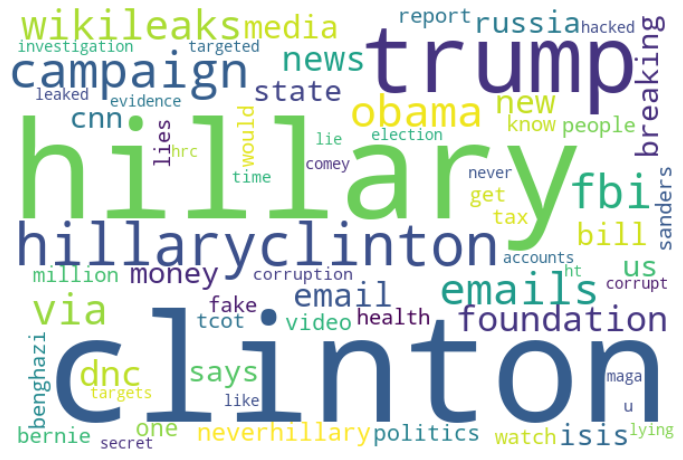

In [51]:
# Clinton Tweets
tweets = " ".join(df[df['label'] == 'clinton'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

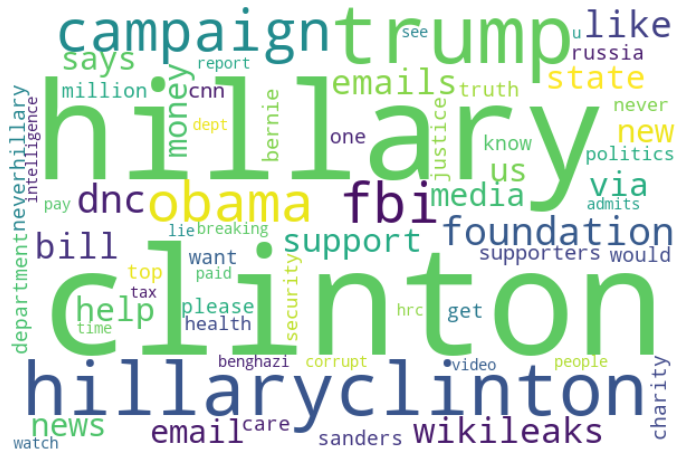

In [58]:
# Clinton -- POSITIVE
tweets = " ".join(df[(df['label'] == 'clinton') & 
                     (df['sentiment'] == 'positive')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

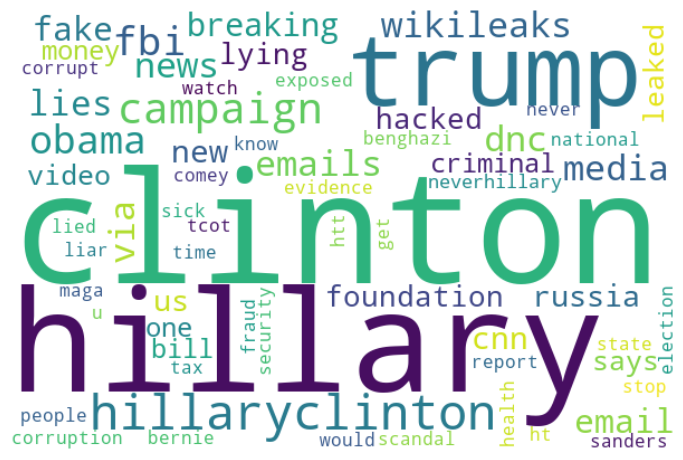

In [59]:
# Clinton -- NEGATIVE
tweets = " ".join(df[(df['label'] == 'clinton') & 
                     (df['sentiment'] == 'negative')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

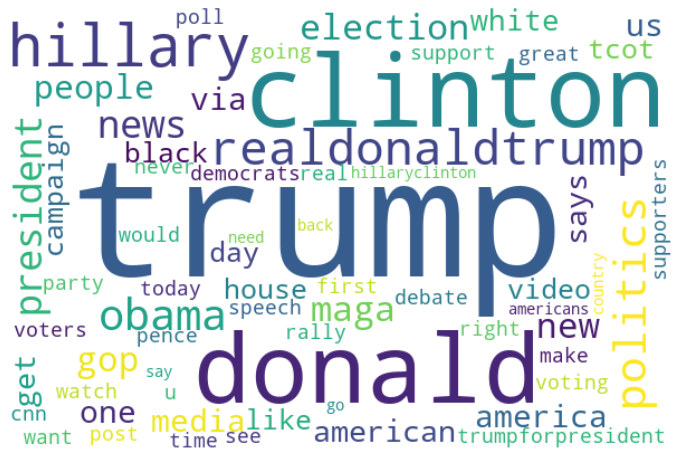

In [54]:
# trump tweets

tweets = " ".join(df[df['label'] == 'trump'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

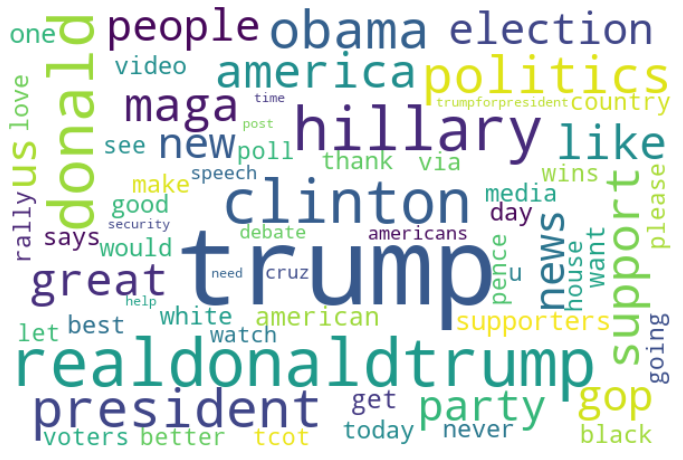

In [60]:
# trump -- NEGATIVE
tweets = " ".join(df[(df['label'] == 'trump') & 
                     (df['sentiment'] == 'positive')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

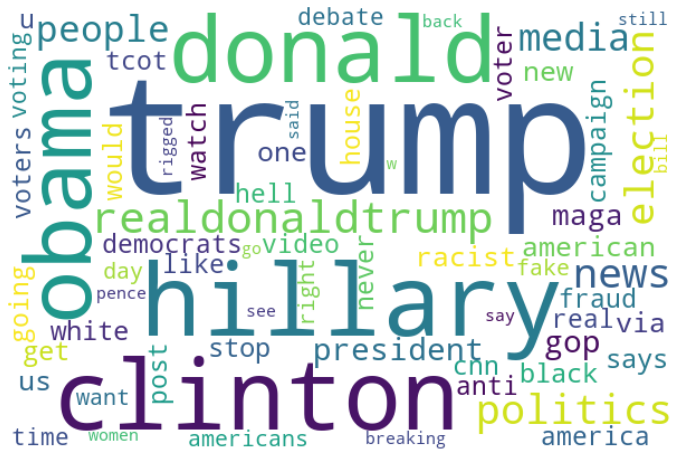

In [61]:
# trump -- NEGATIVE
tweets = " ".join(df[(df['label'] == 'trump') & 
                     (df['sentiment'] == 'negative')]
                  .clean_no_stops.values).split()

make_wordcloud(tweets, 65)

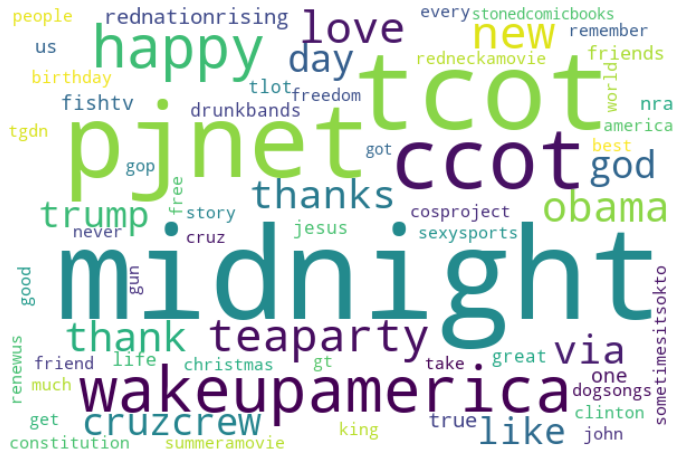

In [50]:
# Right wing news tweets
tweets = " ".join(df[df['label'] == 'right_wing_news'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

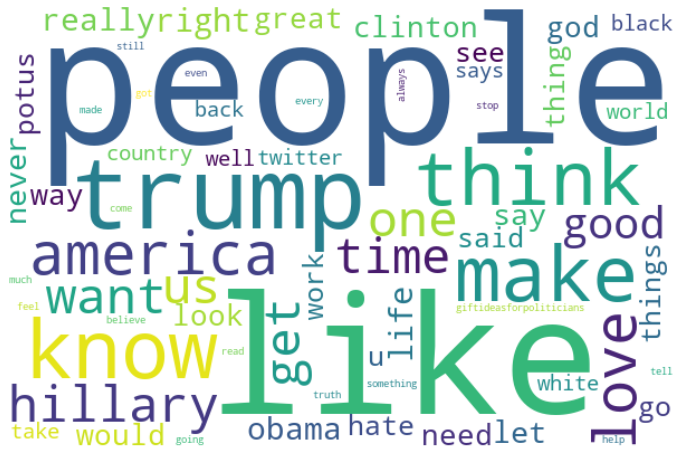

In [55]:
# Conservative tweets
tweets = " ".join(df[df['label'] == 'conservative'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

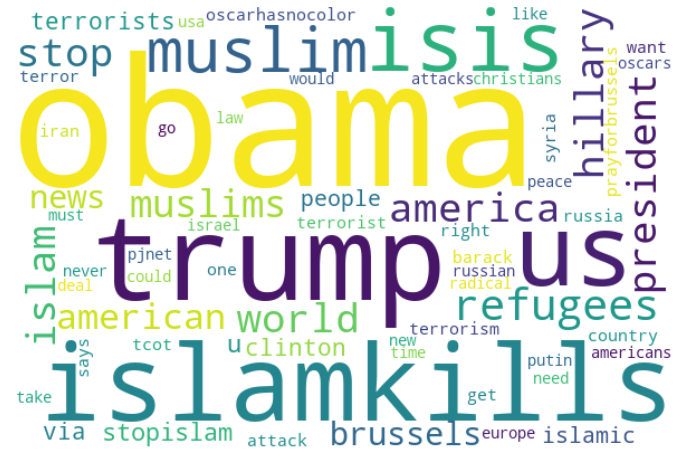

In [53]:
# Middle east tweets
tweets = " ".join(df[df['label'] == 'middle_east'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

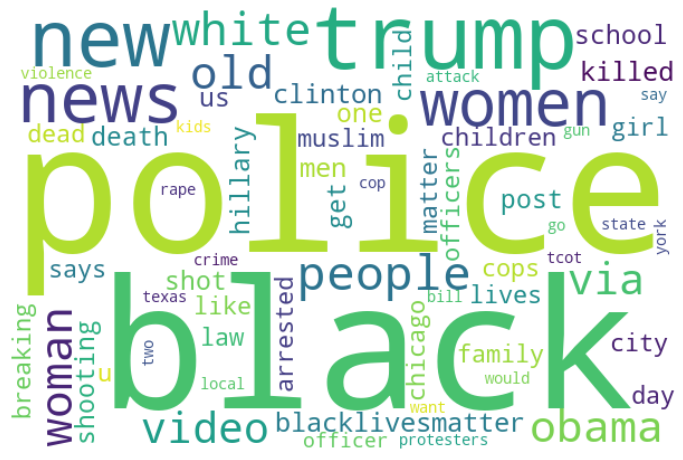

In [56]:
# Violence Tweets
tweets = " ".join(df[df['label'] == 'violence'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

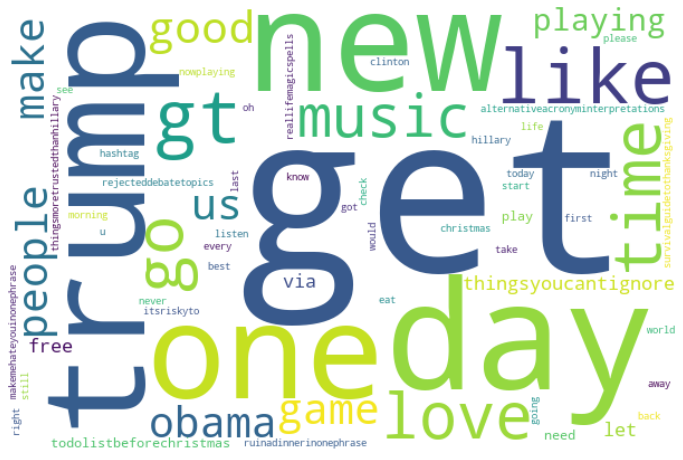

In [57]:
# General Tweets
tweets = " ".join(df[df['label'] == 'general'].clean_no_stops.values).split()

make_wordcloud(tweets, 65)

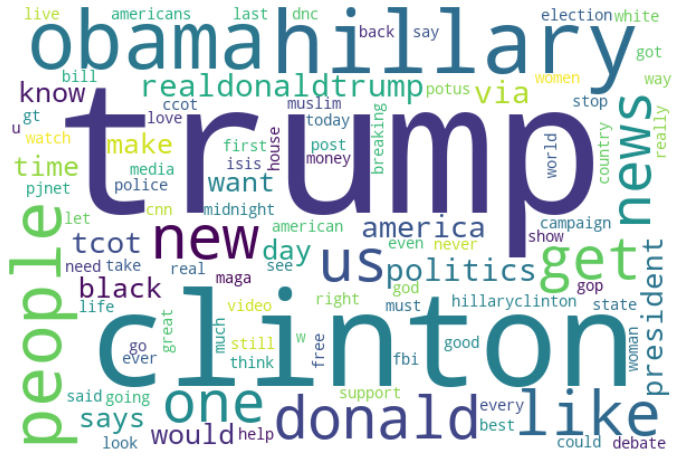

In [72]:
# all tweets
tweets = " ".join(df.clean_no_stops.values).split()

make_wordcloud(tweets, 100)